In [6]:
import networkx as nx
import numpy as np
import grakel as gk
import matplotlib
import scipy
import string
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
from datetime import datetime
# %reset
# load script
import MMDforGraphs as mg




This notebook plays around with graph kernels and kernel mmd bootstrap test.   



In [46]:
alpha = 0.05

# Create samples
At the current state of the code, the sampling has to be run every time before a kernel is fit.

## Binomial




In [55]:
n = 20
m = 20
nr_nodes_1 = 10
nr_nodes_2 = 10
p_edge_1 = 0.5
p_edge_2 = 0.51


label_1 = dict( ( (i, 'a') for i in range(nr_nodes_1) ) )
label_2 = dict( ( (i, 'a') for i in range(nr_nodes_2) ) )

Gs = mg.GraphTwoSample(n = n, m = m, type1 ="binomial", type2 = "binomial", nr_nodes_1 = nr_nodes_1, nr_nodes_2 = nr_nodes_2, p_edge_1 = p_edge_1 , p_edge_2 = p_edge_2, label_1 =label_1, label_2 = label_2)

graph_list = gk.graph_from_networkx(Gs, node_labels_tag='label')

# Weisfeiler-Lehman Shortest Path Kernel


Calculate the kernel

In [50]:
start_time = time.time()
kernel_wlsp = [{"name": "WL", "n_iter": 5}, {"name": "shortest_path"}] #
K_wlsp = mg.KernelMatrix(graph_list, kernel_wlsp, True)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.1466073989868164 seconds ---


Because we are assuming an i.i.d sample we can simply bootstrap the kernel matrix

In [51]:
# Calculate the mmd value for the sample
p_b_value, p_u_value, mmd_b_null, mmd_u_null, mmd_b_sample, mmd_u_sample = mg.BootstrapPval(B = 1000, K = K_wlsp , n = n, m = m, seed = 123)


In [59]:
print("Biased p-value: " + str(p_b_value))
print("Unbiased p-value: " + str(p_u_value))
print("Biased hypothesis acceped:" + str(mmd_b_sample < (math.sqrt(2*K_wlsp.max()/n))*(1 + math.sqrt(2*math.log(1/alpha)))))
print("Unbiased hypothesis acceped:" + str(mmd_u_sample < (4*K_wlsp.max()/math.sqrt(n))*math.sqrt(math.log(1/alpha))))

Biased p-value: 0.388
Unbiased p-value: 0.388
Biased hypothesis acceped:True
Biased hypothesis acceped:True


# Weisfeiler-Lehman Subtree Kernel

In [56]:
start_time = time.time()
kernel_wlst = [{"name": "weisfeiler_lehman", "n_iter": 5}, {"name": "vertex_histogram"}] #
K_wlst = mg.KernelMatrix(graph_list, kernel_wlst, True)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.01695394515991211 seconds ---


In [57]:
p_b_value, p_u_value, mmd_b_null, mmd_u_null, mmd_b_sample, mmd_u_sample = mg.BootstrapPval(B = 1000, K = K_wlst, n = n, m = m, seed = 123)

In [58]:
print("Biased p-value: " + str(p_b_value))
print("Unbiased p-value: " + str(p_u_value))
print("Biased hypothesis acceped:" + str(mmd_b_sample < (math.sqrt(2*K_wlsp.max()/n))*(1 + math.sqrt(2*math.log(1/alpha)))))
print("Unbiased hypothesis acceped:" + str(mmd_u_sample < (4*K_wlsp.max()/math.sqrt(n))*math.sqrt(math.log(1/alpha))))

Biased p-value: 0.388
Unbiased p-value: 0.388
True
True


# Weisfeiler-Lehman Optimal Assignment


In [383]:
start_time = time.time()
kernel_wloa = [{"name": "WL-OA", "n_iter": 5}] 
K_wloa = mg.KernelMatrix(graph_list, kernel_wloa, True)
print("--- %s seconds ---" % (time.time() - start_time))

--- 49.51429080963135 seconds ---


In [301]:
p_b_value, p_u_value, mmd_b_null, mmd_u_null, mmd_b_sample, mmd_u_sample = mg.BootstrapPval(B = 1000, K = K_wloa, n = n, m = m, seed = 123)

In [31]:
print("Biased p-value: " + str(p_b_value))
print("Unbiased p-value: " + str(p_u_value))
print("Biased hypothesis acceped:" + str(mmd_b_sample < (math.sqrt(2*K_wlsp.max()/n))*(1 + math.sqrt(2*math.log(1/alpha)))))
print("Unbiased hypothesis acceped:" + str(mmd_u_sample < (4*K_wlsp.max()/math.sqrt(n))*math.sqrt(math.log(1/alpha))))

Biased p-value: 0.362
Unbiased p-value: 0.362


NameError: name 'math' is not defined

# Shortest-Path Kernel

In [381]:
kernel_sp = [{"name": "shortest_path", "with_labels": False}] 
K_sp = mg.KernelMatrix(graph_list, kernel_sp, True)

ValueError: parsed input is empty

In [315]:
p_b_value, p_u_value, mmd_b_null, mmd_u_null, mmd_b_sample, mmd_u_sample = mg.BootstrapPval(B = 1000, K = K_sp, n = n, m = m, seed = 123)

In [316]:
print("Biased p-value: " + str(p_b_value))
print("Unbiased p-value: " + str(p_u_value))
print("Biased hypothesis acceped:" + str(mmd_b_sample < (math.sqrt(2*K_wlsp.max()/n))*(1 + math.sqrt(2*math.log(1/alpha)))))
print("Unbiased hypothesis acceped:" + str(mmd_u_sample < (4*K_wlsp.max()/math.sqrt(n))*math.sqrt(math.log(1/alpha))))

1.0
[0.    0.    0.    0.    0.    0.    0.    0.001 0.    0.001 0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.001 0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.001 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.001 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0. 

# Random Walk

In [319]:
kernel_rw = [{"name": "random_walk", "lambda": 0.1}] 
K_rw = mg.KernelMatrix(graph_list, kernel_sp, True)

In [320]:
p_b_value, p_u_value, mmd_b_null, mmd_u_null, mmd_b_sample, mmd_u_sample = mg.BootstrapPval(B = 1000, K = K_rw, n = n, m = m, seed = 123)

In [321]:
print("Biased p-value: " + str(p_b_value))
print("Unbiased p-value: " + str(p_u_value))
print("Biased hypothesis acceped:" + str(mmd_b_sample < (math.sqrt(2*K_wlsp.max()/n))*(1 + math.sqrt(2*math.log(1/alpha)))))
print("Unbiased hypothesis acceped:" + str(mmd_u_sample < (4*K_wlsp.max()/math.sqrt(n))*math.sqrt(math.log(1/alpha))))

1.0
[0.001 0.002 0.002 0.002 0.    0.002 0.002 0.001 0.    0.001 0.001 0.002
 0.001 0.002 0.    0.    0.001 0.    0.002 0.    0.003 0.001 0.002 0.001
 0.002 0.001 0.002 0.001 0.002 0.    0.    0.001 0.    0.    0.001 0.
 0.    0.    0.003 0.001 0.001 0.    0.    0.    0.    0.    0.    0.001
 0.001 0.001 0.002 0.001 0.    0.002 0.    0.001 0.001 0.003 0.    0.001
 0.002 0.003 0.    0.001 0.001 0.    0.001 0.002 0.002 0.001 0.    0.001
 0.    0.001 0.001 0.002 0.    0.    0.    0.    0.001 0.    0.001 0.004
 0.    0.    0.    0.    0.    0.001 0.001 0.    0.    0.001 0.002 0.001
 0.002 0.    0.001 0.002 0.001 0.001 0.001 0.    0.    0.    0.002 0.
 0.001 0.    0.002 0.002 0.001 0.001 0.002 0.    0.    0.    0.001 0.004
 0.    0.    0.001 0.    0.001 0.001 0.001 0.002 0.002 0.002 0.001 0.
 0.    0.    0.    0.    0.002 0.    0.002 0.003 0.    0.001 0.001 0.001
 0.001 0.    0.    0.    0.001 0.    0.    0.001 0.    0.003 0.    0.
 0.    0.002 0.    0.001 0.001 0.001 0.001 0.    0.001 0.  

# Plotting script runs (the script needs to be run first)

In [8]:
df_Binomial_WLOA = pd.read_pickle("data/run_wl_oa_10samples.pkl")
df_Binomial_WLOA.head(20)



,kernel,m,n,nr_nodes_1,nr_nodes_2,p_edge_1,p_edge_2,rejections_b,rejections_statistic_b,rejections_statistic_u,rejections_u,run_info,run_time,timestap
0,shortest_path,10.0,10.0,10.0,10.0,0.500,0.500,0.056,0.0,0.0,0.054,"B:500,N:500,wl_itr:3",0:00:10.552417,2021-03-17 17:51:51.552297
1,shortest_path,10.0,10.0,10.0,10.0,0.505,0.495,0.058,0.0,0.0,0.058,"B:500,N:500,wl_itr:3",0:00:10.534413,2021-03-17 17:51:51.552297
2,shortest_path,10.0,10.0,10.0,10.0,0.510,0.490,0.058,0.0,0.0,0.058,"B:500,N:500,wl_itr:3",0:00:10.423698,2021-03-17 17:51:51.552297
3,shortest_path,10.0,10.0,10.0,10.0,0.515,0.485,0.112,0.0,0.0,0.110,"B:500,N:500,wl_itr:3",0:00:10.395254,2021-03-17 17:51:51.552297
4,shortest_path,10.0,10.0,10.0,10.0,0.520,0.480,0.142,0.0,0.0,0.144,"B:500,N:500,wl_itr:3",0:00:10.451652,2021-03-17 17:51:51.552297
5,shortest_path,10.0,10.0,10.0,10.0,0.550,0.450,0.616,0.0,0.0,0.616,"B:500,N:500,wl_itr:3",0:00:10.377892,2021-03-17 17:51:51.552297
6,shortest_path,10.0,10.0,25.0,25.0,0.500,0.500,0.072,0.0,0.0,0.074,"B:500,N:500,wl_itr:3",0:00:17.138341,2021-03-17 17:51:51.552297
7,shortest_path,10.0,10.0,25.0,25.0,0.505,0.495,0.076,0.0,0.0,0.076,"B:500,N:500,wl_itr:3",0:00:17.191203,2021-03-17 17:51:51.552297
8,shortest_path,10.0,10.0,25.0,25.0,0.510,0.490,0.170,0.0,0.0,0.172,"B:500,N:500,wl_itr:3",0:00:17.043439,2021-03-17 17:51:51.552297
9,shortest_path,10.0,10.0,25.0,25.0,0.515,0.485,0.318,0.0,0.0,0.320,"B:500,N:500,wl_itr:3",0:00:17.050085,2021-03-17 17:51:51.552297


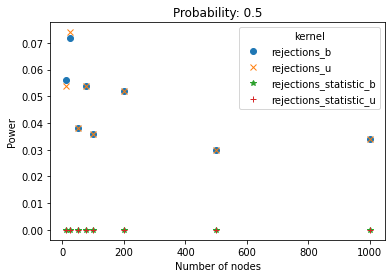

In [14]:
fig, ax = plt.subplots()

p = 0.5

lines, = ax.plot(df_Binomial_WLOA['nr_nodes_1'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], 
            df_Binomial_WLOA['rejections_b'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], 'o', label='rejections_b')
lines, = ax.plot(df_Binomial_WLOA['nr_nodes_1'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], 
            df_Binomial_WLOA['rejections_u'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], 'x', label='rejections_u')
lines, = ax.plot(df_Binomial_WLOA['nr_nodes_1'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], 
            df_Binomial_WLOA['rejections_statistic_b'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], '*', label='rejections_statistic_b')
lines, = ax.plot(df_Binomial_WLOA['nr_nodes_1'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], 
            df_Binomial_WLOA['rejections_statistic_u'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], '+', label='rejections_statistic_u')



ax.legend(title = 'kernel')
ax.set_title("Probability: " + str(0.5 + (p-0.5)/2) + " and " + str(0.5 - (p-0.5)/2))
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Power')
plt.show()

In [55]:
from datetime import datetime

# current date and time
now = datetime.now()

timestamp = datetime.timestamp(now)
print("timestamp =", pd.Timestamp(now))
print(pd.Timestamp(now))

timestamp = 2021-03-16 17:20:58.742771
2021-03-16 17:20:58.742771
